# Predicting diabetes status using NHANES

[DSLC stages]: Analysis



The following code sets up the libraries and creates cleaned and pre-processed training, validation and test data that we will use in this document.

In [46]:
import pandas as pd
import numpy as np
import plotly.express as px

from functions.load_diabetes_data import load_diabetes_data
# load the diabetes data

train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')
imputed_2017 = pd.read_csv('imputed_2017.csv')

train_data_noSMOTE = pd.read_csv('train_data_noSMOTE.csv')
val_data_noSMOTE = pd.read_csv('val_data_noSMOTE.csv')
test_data_noSMOTE = pd.read_csv('test_data_noSMOTE.csv')

pd.set_option('display.max_columns', None)

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)
print(imputed_2017.shape)

(37633, 35)
(4705, 35)
(4704, 35)
(26311, 35)


In [35]:
X_train_noSMOTE = train_data_noSMOTE.drop(['diabetes', 'house_family_person_id'], axis=1)
y_train_noSMOTE = train_data_noSMOTE['diabetes']

X_val_noSMOTE = val_data_noSMOTE.drop(['diabetes', 'house_family_person_id'], axis=1)
y_val_noSMOTE = val_data_noSMOTE['diabetes']

X_test_noSMOTE = test_data_noSMOTE.drop(['diabetes', 'house_family_person_id'], axis=1)
y_test_noSMOTE = test_data_noSMOTE['diabetes']

# Optional: Check for missing values
#print(X_train.isnull().sum())
#print(X_val.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_train_scaled_noSMOTE = scaler.fit_transform(X_train_noSMOTE)
X_val_scaled_noSMOTE = scaler.transform(X_val_noSMOTE)
X_test_scaled_noSMOTE = scaler.transform(X_test_noSMOTE)

In [18]:
train_data.head(10)

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,medicated,prediabetes,insulin,region_Midwest,region_Northwest,region_South,marital_status_Divorced,marital_status_Living with partner,marital_status_Married,marital_status_Never_married,marital_status_Separated,marital_status_Widdowed
0,277060102.0,1.0,60.0,0.0,1.0,0.0,136.2,2307.4,66.0,1.0,0.0,0.0,1.0,1.0,5.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,389730101.0,1.0,48.0,1.0,0.0,0.0,188.0,2624.0,71.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,468630101.0,0.0,66.0,0.0,1.0,0.0,140.0,2261.0,66.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,256810101.0,0.0,48.0,1.0,1.0,0.0,165.0,2829.0,64.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,300550101.0,0.0,39.0,1.0,0.0,0.0,148.0,2316.0,67.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,652990101.0,0.0,61.0,1.0,0.0,0.0,195.0,3055.0,67.0,1.0,1.0,0.0,0.0,1.0,7.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,429240101.0,0.0,69.0,1.0,1.0,0.0,140.0,2330.0,65.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7,628450101.0,1.0,80.0,0.0,0.0,1.0,212.0,2583.0,76.0,1.0,0.0,0.0,1.0,1.0,7.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,392830101.0,0.0,60.0,0.0,0.0,0.0,214.0,2903.0,72.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,139790101.0,0.0,30.0,0.0,0.0,0.0,242.0,3026.0,75.0,0.0,0.0,0.0,0.0,1.0,7.0,3.0,3.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
import pandas as pd
import statsmodels.api as sm

# Sample dataset
# df = pd.read_csv('your_data.csv')  # Load your dataset

# Prepare your features (X)
# Assuming 'diabetes' is your target variable and all other columns are features
X = train_data.drop(columns=['diabetes'])

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [sm.OLS(X[column], X.loc[:, X.columns != column]).fit().rsquared for column in X.columns]

# Calculate the VIF
vif_data['VIF'] = 1 / (1 - vif_data['VIF'])

# Display the VIF results
print(vif_data)


                               Feature          VIF
0                                const  1733.114392
1               house_family_person_id     1.009493
2                                  age     2.017734
3                               smoker     1.070471
4                                  sex     2.042067
5               coronary_heart_disease     1.202662
6                               weight     3.332867
7                                  bmi     2.734942
8                               height     2.788603
9                         hypertension     1.587684
10                     heart_condition     1.141521
11                              cancer     1.106445
12             family_history_diabetes     1.115867
13           doctor_recommend_exercise     1.229994
14          moderate_physical_activity     1.103417
15          vigorous_physical_activity     1.155337
16                   alcohol_past_year     1.007329
17    high_blood_pressure_prescription     1.061586
18          

In [50]:
# Identify columns with mean above the threshold
threshold = 10
columns_to_drop = vif_data[vif_data["VIF"] > threshold]
print(columns_to_drop)
#print(vif_data[vif_data["VIF"] > threshold])
columns_to_drop = columns_to_drop["Feature"]
print(columns_to_drop.values)

# Drop those columns
train_data = train_data.drop(columns=columns_to_drop.values[1:])

                               Feature          VIF
0                                const  1733.114392
29             marital_status_Divorced    75.039325
30  marital_status_Living with partner    26.758011
31              marital_status_Married   130.228658
32        marital_status_Never_married    81.063712
33            marital_status_Separated    15.997434
34             marital_status_Widdowed    57.809216
['const' 'marital_status_Divorced' 'marital_status_Living with partner'
 'marital_status_Married' 'marital_status_Never_married'
 'marital_status_Separated' 'marital_status_Widdowed']


In [71]:
X_test_2017 = imputed_2017.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_test_2017 = imputed_2017['diabetes']
X_test_2017 = X_test_2017.drop(columns=columns_to_drop.values[1:])

# To predict on the test data
X_test = test_data.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_test = test_data['diabetes']
X_test = X_test.drop(columns=columns_to_drop.values[1:])

In [25]:
#!pip install xgboost
import xgboost as xgb
print(xgb.__version__)

2.1.1


In [62]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(X_test_2017.shape)

(37633, 27)
(4704, 27)
(4705, 27)
(26311, 27)


In [127]:
X_test_2017.head()

,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,medicated,prediabetes,insulin,stroke,cholesterol,region_Midwest,region_Northwest,region_South
0,65.0,1.0,1.0,0.0,155.0,2930.0,61.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,19.0,0.0,0.0,0.0,180.0,2309.0,74.0,0.0,0.0,0.0,0.0,1.0,3.8,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,45.0,1.0,0.0,0.0,240.0,3544.0,69.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,67.0,1.0,1.0,0.0,236.0,4313.0,62.0,0.0,0.0,0.0,0.0,1.0,7.0,3.0,12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,40.0,1.0,0.0,0.0,182.0,3227.0,63.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [65]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming the target variable is named 'diabetes' and is binary (0 or 1)
X_train = train_data.drop(['diabetes', 'house_family_person_id'], axis=1)
y_train = train_data['diabetes']

X_val = val_data.drop(['diabetes', 'house_family_person_id'], axis=1)
y_val = val_data['diabetes']
# Drop those columns
X_val = X_val.drop(columns=columns_to_drop.values[1:])

# Optional: Check for missing values
#print(X_train.isnull().sum())
#print(X_val.isnull().sum())

# Scale the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)

xgb_clf = XGBClassifier(
    n_estimators=2000, 
    learning_rate=0.005, 
    eval_metric='aucpr', 
    max_depth=5,
    reg_alpha=5,  # Increased L1 regularization
    reg_lambda=15  # Increased L2 regularization
)
#xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.01, eval_metric='aucpr', max_depth=3)
xgb_clf.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

y_train_pred = xgb_clf.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = xgb_clf.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = xgb_clf.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

#X_test_2017 = X_test_2017.drop(columns=columns_to_drop.values[1:])
y_pred_2017 = xgb_clf.predict(X_test_2017)
y_pred_probs = xgb_clf.predict_proba(X_test_2017)[:, 1]
threshold = 0.3
y_pred_custom = (y_pred_probs >= threshold).astype(int)  # Apply custom threshold
print()
print(confusion_matrix(y_test_2017, y_pred_custom))
print(classification_report(y_test_2017, y_pred_custom))

print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))

Train
Accuracy: 0.9536842664682592
Confusion Matrix:
 [[18341   484]
 [ 1259 17549]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     18825
         1.0       0.97      0.93      0.95     18808

    accuracy                           0.95     37633
   macro avg       0.95      0.95      0.95     37633
weighted avg       0.95      0.95      0.95     37633

VAL
Accuracy: 0.9530187074829932
Confusion Matrix:
 [[2257   66]
 [ 155 2226]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2323
         1.0       0.97      0.93      0.95      2381

    accuracy                           0.95      4704
   macro avg       0.95      0.95      0.95      4704
weighted avg       0.95      0.95      0.95      4704

TEST
Accuracy: 0.9534537725823592
Confusion Matrix:
 [[2316   57]
 [ 162 2170]]
Classification Report:
               precision    rec

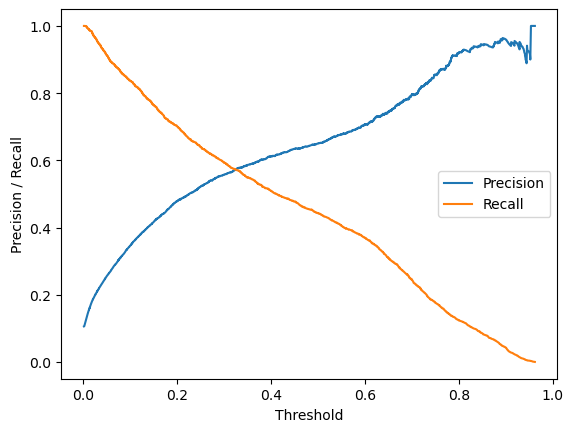

In [27]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test_2017, y_pred_probs)

# Plot the Precision-Recall curve
import matplotlib.pyplot as plt

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision / Recall")
plt.legend(loc="best")
plt.show()


In [ ]:
from sklearn.metrics import f1_score

# Initialize best score
best_threshold = 0.5
best_f1 = 0

# Test different thresholds
for thresh in thresholds:
    y_pred_thresh = (y_pred_probs >= thresh).astype(int)
    f1 = f1_score(y_test_2017, y_pred_thresh)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print(f"Best F1-Score: {best_f1} at Threshold: {best_threshold}")


In [66]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Initialize the LightGBM classifier
lgb_clf = lgb.LGBMClassifier(
    n_estimators=2000,      # Number of trees (boosting rounds)
    learning_rate=0.005,     # Learning rate
    is_unbalance=True,      # Set to True if your data is imbalanced
    num_leaves=31,          # Maximum number of leaves in one tree
    max_depth=-1            # Unlimited tree depth
)

# Train the model on the training data
lgb_clf.fit(X_train, y_train)


# Make predictions
y_train_pred = lgb_clf.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = lgb_clf.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = lgb_clf.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

#X_test_2017 = X_test_2017.drop(columns=columns_to_drop.values[1:])
y_pred_2017 = lgb_clf.predict(X_test_2017)

print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))

[LightGBM] [Info] Number of positive: 18808, number of negative: 18825
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006326 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6881
[LightGBM] [Info] Number of data points in the train set: 37633, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499774 -> initscore=-0.000903
[LightGBM] [Info] Start training from score -0.000903
Train
Accuracy: 0.962745462758749
Confusion Matrix:
 [[18519   306]
 [ 1096 17712]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     18825
         1.0       0.98      0.94      0.96     18808

    accuracy                           0.96     37633
   macro avg       0.96      0.96      0.96     37633
weighted avg       0.96      0.96      0.96     37633

VAL
Accuracy: 0.9570578231292517
Confusion Matrix:
 [[2268   55]
 [ 147

In [54]:
from catboost import CatBoostClassifier

# Initialize the CatBoostClassifier
cat = CatBoostClassifier(iterations=1000, learning_rate=0.01, depth=6)

# Fit the model
cat.fit(X_train, y_train)

# Make predictions
y_train_pred = cat.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = cat.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = cat.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

#X_test_2017 = X_test_2017.drop(columns=columns_to_drop.values[1:])
y_pred_2017 = cat.predict(X_test_2017)

print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))

0:	learn: 0.6754036	total: 172ms	remaining: 2m 52s
1:	learn: 0.6588822	total: 200ms	remaining: 1m 40s
2:	learn: 0.6431563	total: 229ms	remaining: 1m 15s
3:	learn: 0.6284297	total: 257ms	remaining: 1m 3s
4:	learn: 0.6163656	total: 288ms	remaining: 57.4s
5:	learn: 0.6022816	total: 317ms	remaining: 52.4s
6:	learn: 0.5890555	total: 343ms	remaining: 48.7s
7:	learn: 0.5749990	total: 372ms	remaining: 46.2s
8:	learn: 0.5615757	total: 405ms	remaining: 44.6s
9:	learn: 0.5494727	total: 435ms	remaining: 43s
10:	learn: 0.5380519	total: 464ms	remaining: 41.8s
11:	learn: 0.5260613	total: 508ms	remaining: 41.8s
12:	learn: 0.5148901	total: 546ms	remaining: 41.5s
13:	learn: 0.5043925	total: 577ms	remaining: 40.7s
14:	learn: 0.4938695	total: 602ms	remaining: 39.5s
15:	learn: 0.4831472	total: 629ms	remaining: 38.7s
16:	learn: 0.4731360	total: 657ms	remaining: 38s
17:	learn: 0.4639362	total: 694ms	remaining: 37.9s
18:	learn: 0.4543139	total: 720ms	remaining: 37.2s
19:	learn: 0.4456222	total: 744ms	remainin

162:	learn: 0.1566992	total: 4.88s	remaining: 25.1s
163:	learn: 0.1564547	total: 4.91s	remaining: 25.1s
164:	learn: 0.1562255	total: 4.94s	remaining: 25s
165:	learn: 0.1556544	total: 4.97s	remaining: 25s
166:	learn: 0.1554670	total: 5s	remaining: 25s
167:	learn: 0.1550976	total: 5.04s	remaining: 25s
168:	learn: 0.1547003	total: 5.07s	remaining: 24.9s
169:	learn: 0.1543819	total: 5.11s	remaining: 25s
170:	learn: 0.1540333	total: 5.15s	remaining: 25s
171:	learn: 0.1537322	total: 5.17s	remaining: 24.9s
172:	learn: 0.1532986	total: 5.21s	remaining: 24.9s
173:	learn: 0.1529720	total: 5.24s	remaining: 24.9s
174:	learn: 0.1526644	total: 5.27s	remaining: 24.8s
175:	learn: 0.1524949	total: 5.29s	remaining: 24.8s
176:	learn: 0.1522939	total: 5.32s	remaining: 24.8s
177:	learn: 0.1518307	total: 5.35s	remaining: 24.7s
178:	learn: 0.1516355	total: 5.39s	remaining: 24.7s
179:	learn: 0.1512148	total: 5.42s	remaining: 24.7s
180:	learn: 0.1509001	total: 5.45s	remaining: 24.7s
181:	learn: 0.1507332	total

330:	learn: 0.1307673	total: 9.27s	remaining: 18.7s
331:	learn: 0.1306196	total: 9.29s	remaining: 18.7s
332:	learn: 0.1305757	total: 9.31s	remaining: 18.7s
333:	learn: 0.1305391	total: 9.33s	remaining: 18.6s
334:	learn: 0.1304989	total: 9.36s	remaining: 18.6s
335:	learn: 0.1304158	total: 9.39s	remaining: 18.6s
336:	learn: 0.1302759	total: 9.41s	remaining: 18.5s
337:	learn: 0.1301731	total: 9.43s	remaining: 18.5s
338:	learn: 0.1301457	total: 9.45s	remaining: 18.4s
339:	learn: 0.1300963	total: 9.47s	remaining: 18.4s
340:	learn: 0.1300608	total: 9.49s	remaining: 18.3s
341:	learn: 0.1300256	total: 9.51s	remaining: 18.3s
342:	learn: 0.1299848	total: 9.53s	remaining: 18.3s
343:	learn: 0.1299450	total: 9.55s	remaining: 18.2s
344:	learn: 0.1298236	total: 9.57s	remaining: 18.2s
345:	learn: 0.1297872	total: 9.59s	remaining: 18.1s
346:	learn: 0.1297144	total: 9.61s	remaining: 18.1s
347:	learn: 0.1296784	total: 9.64s	remaining: 18.1s
348:	learn: 0.1296469	total: 9.65s	remaining: 18s
349:	learn: 0.

495:	learn: 0.1234930	total: 13s	remaining: 13.2s
496:	learn: 0.1234686	total: 13s	remaining: 13.2s
497:	learn: 0.1234471	total: 13s	remaining: 13.1s
498:	learn: 0.1234233	total: 13.1s	remaining: 13.1s
499:	learn: 0.1234029	total: 13.1s	remaining: 13.1s
500:	learn: 0.1233809	total: 13.1s	remaining: 13.1s
501:	learn: 0.1233573	total: 13.2s	remaining: 13s
502:	learn: 0.1233231	total: 13.2s	remaining: 13s
503:	learn: 0.1232914	total: 13.2s	remaining: 13s
504:	learn: 0.1232209	total: 13.2s	remaining: 13s
505:	learn: 0.1231952	total: 13.3s	remaining: 12.9s
506:	learn: 0.1231708	total: 13.3s	remaining: 12.9s
507:	learn: 0.1231441	total: 13.3s	remaining: 12.9s
508:	learn: 0.1231165	total: 13.4s	remaining: 12.9s
509:	learn: 0.1230947	total: 13.4s	remaining: 12.9s
510:	learn: 0.1230737	total: 13.4s	remaining: 12.9s
511:	learn: 0.1230454	total: 13.5s	remaining: 12.8s
512:	learn: 0.1230220	total: 13.5s	remaining: 12.8s
513:	learn: 0.1229978	total: 13.5s	remaining: 12.8s
514:	learn: 0.1229818	tota

661:	learn: 0.1192314	total: 17.2s	remaining: 8.77s
662:	learn: 0.1192111	total: 17.2s	remaining: 8.74s
663:	learn: 0.1191849	total: 17.2s	remaining: 8.71s
664:	learn: 0.1191624	total: 17.2s	remaining: 8.69s
665:	learn: 0.1191436	total: 17.3s	remaining: 8.66s
666:	learn: 0.1191242	total: 17.3s	remaining: 8.64s
667:	learn: 0.1190950	total: 17.3s	remaining: 8.62s
668:	learn: 0.1190782	total: 17.4s	remaining: 8.59s
669:	learn: 0.1190611	total: 17.4s	remaining: 8.57s
670:	learn: 0.1190350	total: 17.4s	remaining: 8.54s
671:	learn: 0.1190243	total: 17.5s	remaining: 8.52s
672:	learn: 0.1190073	total: 17.5s	remaining: 8.49s
673:	learn: 0.1189799	total: 17.5s	remaining: 8.47s
674:	learn: 0.1189621	total: 17.5s	remaining: 8.44s
675:	learn: 0.1189384	total: 17.6s	remaining: 8.42s
676:	learn: 0.1189138	total: 17.6s	remaining: 8.39s
677:	learn: 0.1188983	total: 17.6s	remaining: 8.37s
678:	learn: 0.1188789	total: 17.6s	remaining: 8.34s
679:	learn: 0.1188561	total: 17.7s	remaining: 8.32s
680:	learn: 

821:	learn: 0.1159389	total: 21.7s	remaining: 4.69s
822:	learn: 0.1159233	total: 21.7s	remaining: 4.66s
823:	learn: 0.1159075	total: 21.7s	remaining: 4.64s
824:	learn: 0.1158912	total: 21.8s	remaining: 4.61s
825:	learn: 0.1158749	total: 21.8s	remaining: 4.59s
826:	learn: 0.1158596	total: 21.8s	remaining: 4.56s
827:	learn: 0.1158410	total: 21.9s	remaining: 4.54s
828:	learn: 0.1158297	total: 21.9s	remaining: 4.51s
829:	learn: 0.1158077	total: 21.9s	remaining: 4.49s
830:	learn: 0.1157534	total: 22s	remaining: 4.46s
831:	learn: 0.1157375	total: 22s	remaining: 4.44s
832:	learn: 0.1157168	total: 22s	remaining: 4.41s
833:	learn: 0.1157011	total: 22.1s	remaining: 4.39s
834:	learn: 0.1156884	total: 22.1s	remaining: 4.36s
835:	learn: 0.1156686	total: 22.1s	remaining: 4.34s
836:	learn: 0.1156504	total: 22.1s	remaining: 4.31s
837:	learn: 0.1156291	total: 22.2s	remaining: 4.29s
838:	learn: 0.1156139	total: 22.2s	remaining: 4.26s
839:	learn: 0.1156017	total: 22.3s	remaining: 4.24s
840:	learn: 0.1155

985:	learn: 0.1129805	total: 25.7s	remaining: 365ms
986:	learn: 0.1129678	total: 25.7s	remaining: 338ms
987:	learn: 0.1129553	total: 25.7s	remaining: 312ms
988:	learn: 0.1129371	total: 25.7s	remaining: 286ms
989:	learn: 0.1129221	total: 25.8s	remaining: 260ms
990:	learn: 0.1128970	total: 25.8s	remaining: 234ms
991:	learn: 0.1128758	total: 25.8s	remaining: 208ms
992:	learn: 0.1128599	total: 25.8s	remaining: 182ms
993:	learn: 0.1128466	total: 25.8s	remaining: 156ms
994:	learn: 0.1128266	total: 25.8s	remaining: 130ms
995:	learn: 0.1128172	total: 25.9s	remaining: 104ms
996:	learn: 0.1128044	total: 25.9s	remaining: 77.9ms
997:	learn: 0.1127817	total: 25.9s	remaining: 51.9ms
998:	learn: 0.1127738	total: 25.9s	remaining: 26ms
999:	learn: 0.1127486	total: 26s	remaining: 0us
Train
Accuracy: 0.9578295644779847
Confusion Matrix:
 [[18460   365]
 [ 1222 17586]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     18825
     

In [55]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', XGBClassifier(n_estimators=1000, learning_rate=0.01)),
]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)

y_train_pred = stacking_clf.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = stacking_clf.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = stacking_clf.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

#X_test_2017 = X_test_2017.drop(columns=columns_to_drop.values[1:])
y_pred_2017 = stacking_clf.predict(X_test_2017)

print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))

Train
Accuracy: 0.9967581643770096
Confusion Matrix:
 [[18791    34]
 [   88 18720]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18825
         1.0       1.00      1.00      1.00     18808

    accuracy                           1.00     37633
   macro avg       1.00      1.00      1.00     37633
weighted avg       1.00      1.00      1.00     37633

VAL
Accuracy: 0.9553571428571429
Confusion Matrix:
 [[2249   74]
 [ 136 2245]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      2323
         1.0       0.97      0.94      0.96      2381

    accuracy                           0.96      4704
   macro avg       0.96      0.96      0.96      4704
weighted avg       0.96      0.96      0.96      4704

TEST
Accuracy: 0.9583421891604675
Confusion Matrix:
 [[2318   55]
 [ 141 2191]]
Classification Report:
               precision    rec

In [19]:
print(X_test.columns)
print(X_train.columns)

Index(['age', 'smoker', 'sex', 'coronary_heart_disease', 'weight', 'bmi',
       'height', 'hypertension', 'heart_condition', 'cancer',
       'family_history_diabetes', 'doctor_recommend_exercise',
       'moderate_physical_activity', 'vigorous_physical_activity',
       'alcohol_past_year', 'high_blood_pressure_prescription', 'medicated',
       'prediabetes', 'insulin', 'stroke', 'cholesterol', 'region_Midwest',
       'region_Northwest', 'region_South'],
      dtype='object')
Index(['age', 'smoker', 'sex', 'coronary_heart_disease', 'weight', 'bmi',
       'height', 'hypertension', 'heart_condition', 'cancer',
       'family_history_diabetes', 'doctor_recommend_exercise',
       'moderate_physical_activity', 'vigorous_physical_activity',
       'alcohol_past_year', 'high_blood_pressure_prescription', 'medicated',
       'prediabetes', 'insulin', 'stroke', 'cholesterol', 'region_Midwest',
       'region_Northwest', 'region_South'],
      dtype='object')


In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000],
    'scale_pos_weight': [1, 10, 20]  # Adjust this based on the imbalance
}

model = XGBClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='precision', cv=3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred = best_model.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = best_model.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

y_pred_2017 = best_model.predict(X_test_2017)
print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))

KeyboardInterrupt: 

In [30]:
!pip install lightgbm

import lightgbm as lgb

print("LightGBM version:", lgb.__version__)


ModuleNotFoundError: No module named 'lightgbm'

In [31]:
import sys
print(sys.executable)


C:\Users\15184\anaconda3\python.exe


In [2]:
m = 26311
p0 = 0.94
p1 = 0.66
p_ = p1+ 1.95*((p1*(1-p1)/m)**0.5)
p__ = p1-1.95*((p1*(1-p1)/m)**0.5)

print(p_,p__)

0.665694785366072 0.6543052146339281


In [98]:
y_val_pred = xgb_clf.predict(X_val)


# Assuming y_true and y_pred are your true and predicted labels
report = classification_report((y_val, y_val_pred, output_dict=True)
precision_0 = report['0.0']['precision']
recall_0 = report['0.0']['recall']
precision_1 = report['1.0']['precision']
recall_1 = report['1.0']['recall']

y_pred_2017 = xgb_clf.predict(X_test_2017)

report_2017 = classification_report(y_test_2017, y_pred_2017, output_dict=True)
precision_0_2017 = report_2017['0.0']['precision']
recall_0_2017 = report_2017['0.0']['recall']
precision_1_2017 = report_2017['1.0']['precision']
recall_1_2017 = report_2017['1.0']['recall']


In [101]:
import numpy as np
from scipy import stats

# Set the significance level
alpha = 0.05

# Define null hypothesis values (expected precision under H0)
p0_0 = precision_0  # Expected precision for class 0.0 (you can adjust this)
p0_1 = precision_1  # Expected precision for class 1.0 (you can adjust this)

# Get the number of samples for the precision calculations
n = len(y_pred_2017)  # Total number of samples

# 1. Evaluate the performance for class 0.0
observed_precision_0 = precision_0_2017

# Calculate Z-test statistic for class 0.0
Z_0 = (observed_precision_0 - p0_0) / np.sqrt((p0_0 * (1 - p0_0)) / n)

# Calculate p-value for class 0.0
p_value_0 = 2 * (1 - stats.norm.cdf(np.abs(Z_0)))

# Evaluate the hypothesis for class 0.0
print(f"Class 0.0 Performance Evaluation:")
print(f"Observed Precision: {observed_precision_0:.4f}")
print(f"Null Hypothesis Precision (p0): {p0_0:.4f}")
print(f"Z-Statistic: {Z_0:.4f}")
print(f"P-Value: {p_value_0:.4f}")

if p_value_0 < alpha:
    print("Reject the null hypothesis: The model's precision for class 0.0 is significantly different from the expected value.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the model's precision for class 0.0.")

print("\n" + "-"*50 + "\n")  # Separator for clarity

# 2. Evaluate the performance for class 1.0
observed_precision_1 = precision_1_2017

# Calculate Z-test statistic for class 1.0
Z_1 = (observed_precision_1 - p0_1) / np.sqrt((p0_1 * (1 - p0_1)) / n)

# Calculate p-value for class 1.0
p_value_1 = 2 * (1 - stats.norm.cdf(np.abs(Z_1)))

# Evaluate the hypothesis for class 1.0
print(f"Class 1.0 Performance Evaluation:")
print(f"Observed Precision: {observed_precision_1:.4f}")
print(f"Null Hypothesis Precision (p0): {p0_1:.4f}")
print(f"Z-Statistic: {Z_1:.4f}")
print(f"P-Value: {p_value_1:.4f}")

if p_value_1 < alpha:
    print("Reject the null hypothesis: The model's precision for class 1.0 is significantly different from the expected value.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the model's precision for class 1.0.")



Class 0.0 Performance Evaluation:
Observed Precision: 0.9354
Null Hypothesis Precision (p0): 0.9451
Z-Statistic: -6.9477
P-Value: 0.0000
Reject the null hypothesis: The model's precision for class 0.0 is significantly different from the expected value.

--------------------------------------------------

Class 1.0 Performance Evaluation:
Observed Precision: 0.6569
Null Hypothesis Precision (p0): 0.9560
Z-Statistic: -236.4810
P-Value: 0.0000
Reject the null hypothesis: The model's precision for class 1.0 is significantly different from the expected value.


In [39]:
xgb_clf_noSMOTE = XGBClassifier(
    reg_alpha=0.1,  # L1 regularization term (alpha)
    reg_lambda=1    # L2 regularization term (lambda)
)
xgb_clf_noSMOTE = XGBClassifier(n_estimators=1000, learning_rate=0.01)
xgb_clf_noSMOTE.fit(X_train_scaled_noSMOTE, y_train_noSMOTE, eval_set=[(X_val_scaled_noSMOTE, y_val_noSMOTE)])

y_train_pred_noSMOTE = xgb_clf.predict(X_train_noSMOTE)

# Evaluate the model
print("Train_noSMOTE")
print("Accuracy:", accuracy_score(y_train_noSMOTE, y_train_pred_noSMOTE))
print("Confusion Matrix:\n", confusion_matrix(y_train_noSMOTE, y_train_pred_noSMOTE))
print("Classification Report:\n", classification_report(y_train_noSMOTE, y_train_pred_noSMOTE))

y_val_pred_noSMOTE = xgb_clf.predict(X_val_noSMOTE)

# Evaluate the model
print("VAL_noSMOTE")
print("Accuracy:", accuracy_score(y_val_noSMOTE, y_val_pred_noSMOTE))
print("Confusion Matrix:\n", confusion_matrix(y_val_noSMOTE, y_val_pred_noSMOTE))
print("Classification Report:\n", classification_report(y_val_noSMOTE, y_val_pred_noSMOTE))

[0]	validation_0-logloss:0.36085
[1]	validation_0-logloss:0.35843
[2]	validation_0-logloss:0.35608
[3]	validation_0-logloss:0.35378
[4]	validation_0-logloss:0.35157
[5]	validation_0-logloss:0.34943
[6]	validation_0-logloss:0.34730
[7]	validation_0-logloss:0.34523
[8]	validation_0-logloss:0.34323
[9]	validation_0-logloss:0.34126
[10]	validation_0-logloss:0.33935
[11]	validation_0-logloss:0.33744
[12]	validation_0-logloss:0.33564
[13]	validation_0-logloss:0.33382
[14]	validation_0-logloss:0.33207
[15]	validation_0-logloss:0.33033
[16]	validation_0-logloss:0.32865
[17]	validation_0-logloss:0.32697
[18]	validation_0-logloss:0.32536
[19]	validation_0-logloss:0.32378
[20]	validation_0-logloss:0.32221
[21]	validation_0-logloss:0.32067
[22]	validation_0-logloss:0.31912
[23]	validation_0-logloss:0.31766
[24]	validation_0-logloss:0.31620
[25]	validation_0-logloss:0.31479
[26]	validation_0-logloss:0.31338
[27]	validation_0-logloss:0.31200
[28]	validation_0-logloss:0.31066
[29]	validation_0-loglos

[238]	validation_0-logloss:0.21997
[239]	validation_0-logloss:0.21987
[240]	validation_0-logloss:0.21976
[241]	validation_0-logloss:0.21964
[242]	validation_0-logloss:0.21953
[243]	validation_0-logloss:0.21944
[244]	validation_0-logloss:0.21936
[245]	validation_0-logloss:0.21927
[246]	validation_0-logloss:0.21919
[247]	validation_0-logloss:0.21908
[248]	validation_0-logloss:0.21898
[249]	validation_0-logloss:0.21888
[250]	validation_0-logloss:0.21880
[251]	validation_0-logloss:0.21871
[252]	validation_0-logloss:0.21861
[253]	validation_0-logloss:0.21853
[254]	validation_0-logloss:0.21845
[255]	validation_0-logloss:0.21838
[256]	validation_0-logloss:0.21830
[257]	validation_0-logloss:0.21821
[258]	validation_0-logloss:0.21811
[259]	validation_0-logloss:0.21804
[260]	validation_0-logloss:0.21796
[261]	validation_0-logloss:0.21788
[262]	validation_0-logloss:0.21780
[263]	validation_0-logloss:0.21772
[264]	validation_0-logloss:0.21765
[265]	validation_0-logloss:0.21756
[266]	validation_0-l

[473]	validation_0-logloss:0.21116
[474]	validation_0-logloss:0.21116
[475]	validation_0-logloss:0.21113
[476]	validation_0-logloss:0.21113
[477]	validation_0-logloss:0.21114
[478]	validation_0-logloss:0.21114
[479]	validation_0-logloss:0.21113
[480]	validation_0-logloss:0.21112
[481]	validation_0-logloss:0.21112
[482]	validation_0-logloss:0.21112
[483]	validation_0-logloss:0.21110
[484]	validation_0-logloss:0.21108
[485]	validation_0-logloss:0.21108
[486]	validation_0-logloss:0.21110
[487]	validation_0-logloss:0.21109
[488]	validation_0-logloss:0.21107
[489]	validation_0-logloss:0.21107
[490]	validation_0-logloss:0.21106
[491]	validation_0-logloss:0.21106
[492]	validation_0-logloss:0.21105
[493]	validation_0-logloss:0.21106
[494]	validation_0-logloss:0.21106
[495]	validation_0-logloss:0.21106
[496]	validation_0-logloss:0.21105
[497]	validation_0-logloss:0.21103
[498]	validation_0-logloss:0.21103
[499]	validation_0-logloss:0.21103
[500]	validation_0-logloss:0.21103
[501]	validation_0-l

[708]	validation_0-logloss:0.21091
[709]	validation_0-logloss:0.21091
[710]	validation_0-logloss:0.21091
[711]	validation_0-logloss:0.21091
[712]	validation_0-logloss:0.21091
[713]	validation_0-logloss:0.21091
[714]	validation_0-logloss:0.21091
[715]	validation_0-logloss:0.21092
[716]	validation_0-logloss:0.21093
[717]	validation_0-logloss:0.21092
[718]	validation_0-logloss:0.21093
[719]	validation_0-logloss:0.21093
[720]	validation_0-logloss:0.21093
[721]	validation_0-logloss:0.21094
[722]	validation_0-logloss:0.21093
[723]	validation_0-logloss:0.21092
[724]	validation_0-logloss:0.21092
[725]	validation_0-logloss:0.21092
[726]	validation_0-logloss:0.21092
[727]	validation_0-logloss:0.21093
[728]	validation_0-logloss:0.21094
[729]	validation_0-logloss:0.21094
[730]	validation_0-logloss:0.21094
[731]	validation_0-logloss:0.21093
[732]	validation_0-logloss:0.21092
[733]	validation_0-logloss:0.21094
[734]	validation_0-logloss:0.21095
[735]	validation_0-logloss:0.21093
[736]	validation_0-l

[943]	validation_0-logloss:0.21134
[944]	validation_0-logloss:0.21134
[945]	validation_0-logloss:0.21134
[946]	validation_0-logloss:0.21135
[947]	validation_0-logloss:0.21135
[948]	validation_0-logloss:0.21135
[949]	validation_0-logloss:0.21136
[950]	validation_0-logloss:0.21137
[951]	validation_0-logloss:0.21137
[952]	validation_0-logloss:0.21137
[953]	validation_0-logloss:0.21137
[954]	validation_0-logloss:0.21137
[955]	validation_0-logloss:0.21137
[956]	validation_0-logloss:0.21140
[957]	validation_0-logloss:0.21140
[958]	validation_0-logloss:0.21141
[959]	validation_0-logloss:0.21141
[960]	validation_0-logloss:0.21141
[961]	validation_0-logloss:0.21142
[962]	validation_0-logloss:0.21142
[963]	validation_0-logloss:0.21143
[964]	validation_0-logloss:0.21142
[965]	validation_0-logloss:0.21142
[966]	validation_0-logloss:0.21144
[967]	validation_0-logloss:0.21144
[968]	validation_0-logloss:0.21145
[969]	validation_0-logloss:0.21145
[970]	validation_0-logloss:0.21146
[971]	validation_0-l

C:\Users\15184\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\15184\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\15184\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\15184\anaconda3\Lib\site-packag

In [63]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier  # for regression tasks
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Instantiate the Random Forest Regressor
rf_model = RandomForestClassifier(n_estimators=100)

# Fit the model
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)


# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred =  rf_model.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

y_test_pred = rf_model.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

y_pred_2017 = rf_model.predict(X_test_2017)
print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))


Train
Accuracy: 0.9999734275768607
Confusion Matrix:
 [[18825     0]
 [    1 18807]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     18825
         1.0       1.00      1.00      1.00     18808

    accuracy                           1.00     37633
   macro avg       1.00      1.00      1.00     37633
weighted avg       1.00      1.00      1.00     37633

VAL
Accuracy: 0.9566326530612245
Confusion Matrix:
 [[2269   54]
 [ 150 2231]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2323
         1.0       0.98      0.94      0.96      2381

    accuracy                           0.96      4704
   macro avg       0.96      0.96      0.96      4704
weighted avg       0.96      0.96      0.96      4704

TEST
Accuracy: 0.9581296493092455
Confusion Matrix:
 [[2333   40]
 [ 157 2175]]
Classification Report:
               precision    rec

In [64]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

# Evaluate the model
print("Train")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Classification Report:\n", classification_report(y_train, y_train_pred))

y_val_pred =  model.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# To predict on the test data
#X_test = test_data.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
#y_test = test_data['diabetes']

y_test_pred = model.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

#X_test_2017 = X_test_2017.drop(columns=columns_to_drop.values[1:])
y_pred_2017 = model.predict(X_test_2017)
print("TEST 2017")
print("Accuracy:", accuracy_score(y_test_2017, y_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_pred_2017))

KeyboardInterrupt: 

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load the data
#train_data = pd.read_csv('train_data.csv')
#val_data = pd.read_csv('val_data.csv')
#test_data = pd.read_csv('test_data.csv')

# Inspect the data
#print(train_data.head())
#print(val_data.head())
#print(test_data.head())

# Assuming the target variable is named 'diabetes' and is binary (0 or 1)
#X_train = train_data.drop(['diabetes', 'house_family_person_id'], axis=1)
#y_train = train_data['diabetes']

#X_val = val_data.drop(['diabetes', 'house_family_person_id'], axis=1)
#y_val = val_data['diabetes']

# Optional: Check for missing values
#print(X_train.isnull().sum())
#print(X_val.isnull().sum())

# Scale the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_val_scaled = scaler.transform(X_val)

# Train the logistic regression model
model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)

# Evaluate the model
print("VAL")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

# To predict on the test data
#X_test = test_data.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
#y_test = test_data['diabetes']
X_test_scaled = scaler.transform(X_test)

y_test_pred = model.predict(X_test)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

VAL
Accuracy: 0.8520408163265306
Confusion Matrix:
 [[1955  368]
 [ 328 2053]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85      2323
         1.0       0.85      0.86      0.86      2381

    accuracy                           0.85      4704
   macro avg       0.85      0.85      0.85      4704
weighted avg       0.85      0.85      0.85      4704



NameError: name 'scaler' is not defined

In [72]:
# Train the logistic regression model
model_noSMOTE = LogisticRegression()
model_noSMOTE.fit(X_train_scaled_noSMOTE, y_train_noSMOTE)

# Validate the model
y_val_pred_noSMOTE = model_noSMOTE.predict(X_val_scaled_noSMOTE)

# Evaluate the model
print("VAL_noSMOTE")
print("Accuracy:", accuracy_score(y_val_noSMOTE, y_val_pred_noSMOTE))
print("Confusion Matrix:\n", confusion_matrix(y_val_noSMOTE, y_val_pred_noSMOTE))
print("Classification Report:\n", classification_report(y_val_noSMOTE, y_val_pred_noSMOTE))

# To predict on the test data
X_test_noSMOTE = test_data_noSMOTE.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
y_test_noSMOTE = test_data_noSMOTE['diabetes']
X_test_scaled_noSMOTE = scaler.transform(X_test_noSMOTE)

y_test_pred_noSMOTE = model_noSMOTE.predict(X_test_scaled_noSMOTE)

# Evaluate the model
print("TEST_noSMOTE")
print("Accuracy:", accuracy_score(y_test_noSMOTE, y_test_pred_noSMOTE))
print("Confusion Matrix:\n", confusion_matrix(y_test_noSMOTE, y_test_pred_noSMOTE))
print("Classification Report:\n", classification_report(y_test_noSMOTE, y_test_pred_noSMOTE))

VAL_noSMOTE
Accuracy: 0.9107692307692308
Confusion Matrix:
 [[5653  125]
 [ 455  267]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      5778
         1.0       0.68      0.37      0.48       722

    accuracy                           0.91      6500
   macro avg       0.80      0.67      0.72      6500
weighted avg       0.90      0.91      0.90      6500

TEST_noSMOTE
Accuracy: 0.912
Confusion Matrix:
 [[5778   41]
 [ 531  150]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      5819
         1.0       0.79      0.22      0.34       681

    accuracy                           0.91      6500
   macro avg       0.85      0.61      0.65      6500
weighted avg       0.90      0.91      0.89      6500



In [72]:
# To predict on the test data
model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
model.fit(X_train, y_train)
#X_test_2017 = imputed_2017.drop(['diabetes', 'house_family_person_id'], axis=1)  # Ensure the test data has the same features
#y_test_2017 = imputed_2017['diabetes']
#X_test_scaled_2017 = scaler.transform(X_test_2017)

y_test_pred_2017 = model.predict(X_test_2017)

# Evaluate the model
print("TEST")
print("Accuracy:", accuracy_score(y_test_2017, y_test_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_test_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_test_pred_2017))
'''
y_test_pred_2017 = model_noSMOTE.predict(X_test_scaled_2017)

# Evaluate the model
print("TEST_noSMOTE")
print("Accuracy:", accuracy_score(y_test_2017, y_test_pred_2017))
print("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_test_pred_2017))
print("Classification Report:\n", classification_report(y_test_2017, y_test_pred_2017))'''

TEST
Accuracy: 0.8264604157956749
Confusion Matrix:
 [[19498  4023]
 [  543  2247]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.83      0.90     23521
         1.0       0.36      0.81      0.50      2790

    accuracy                           0.83     26311
   macro avg       0.67      0.82      0.70     26311
weighted avg       0.91      0.83      0.85     26311



'\ny_test_pred_2017 = model_noSMOTE.predict(X_test_scaled_2017)\n\n# Evaluate the model\nprint("TEST_noSMOTE")\nprint("Accuracy:", accuracy_score(y_test_2017, y_test_pred_2017))\nprint("Confusion Matrix:\n", confusion_matrix(y_test_2017, y_test_pred_2017))\nprint("Classification Report:\n", classification_report(y_test_2017, y_test_pred_2017))'

In [97]:
# Example of trying different values for C
for c in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    log_reg_l2 = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    log_reg_l2.fit(X_train, y_train)
    y_pred_l2 = log_reg_l2.predict(X_test_2017)
    #print(f"C: {c}, Performance:\n", classification_report(y_val, y_pred_l2))
    y_test_pred_2017 = log_reg_l2.predict(X_test_2017)
    print(f"C: {c}, Performance:\n", classification_report(y_test_2017, y_test_pred_2017))


C: 0.001, Performance:
               precision    recall  f1-score   support

         0.0       0.94      0.87      0.90     23521
         1.0       0.31      0.50      0.38      2790

    accuracy                           0.83     26311
   macro avg       0.62      0.68      0.64     26311
weighted avg       0.87      0.83      0.84     26311

C: 0.01, Performance:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93     23521
         1.0       0.45      0.69      0.54      2790

    accuracy                           0.88     26311
   macro avg       0.70      0.79      0.74     26311
weighted avg       0.91      0.88      0.89     26311

C: 0.1, Performance:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93     23521
         1.0       0.45      0.69      0.55      2790

    accuracy                           0.88     26311
   macro avg       0.71      0.80      0.74     26311
weigh

In [ ]:
from sklearn.metrics import classification_report

# Assuming y_true and y_pred are your true and predicted labels
report_2017 = classification_report(y_test_2017, y_test_pred_2017)
precision_0_2017 = report['0.0']['precision']
recall_0_2017 = report['0.0']['recall']
precision_1 = report['1.0']['precision']
recall_1 = report['1.0']['recall']


In [ ]:
import numpy as np
from scipy import stats

# Set the significance level
alpha = 0.05

# Define null hypothesis values (expected precision under H0)
p0_0 = precision_0  # Expected precision for class 0.0 (you can adjust this)
p0_1 = precision_1  # Expected precision for class 1.0 (you can adjust this)

# Get the number of samples for the precision calculations
n = len(y_pred_2017)  # Total number of samples

# 1. Evaluate the performance for class 0.0
observed_precision_0 = precision_0_2017

# Calculate Z-test statistic for class 0.0
Z_0 = (observed_precision_0 - p0_0) / np.sqrt((p0_0 * (1 - p0_0)) / n)

# Calculate p-value for class 0.0
p_value_0 = 2 * (1 - stats.norm.cdf(np.abs(Z_0)))

# Evaluate the hypothesis for class 0.0
print(f"Class 0.0 Performance Evaluation:")
print(f"Observed Precision: {observed_precision_0:.4f}")
print(f"Null Hypothesis Precision (p0): {p0_0:.4f}")
print(f"Z-Statistic: {Z_0:.4f}")
print(f"P-Value: {p_value_0:.4f}")

if p_value_0 < alpha:
    print("Reject the null hypothesis: The model's precision for class 0.0 is significantly different from the expected value.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the model's precision for class 0.0.")

print("\n" + "-"*50 + "\n")  # Separator for clarity

# 2. Evaluate the performance for class 1.0
observed_precision_1 = precision_1_2017

# Calculate Z-test statistic for class 1.0
Z_1 = (observed_precision_1 - p0_1) / np.sqrt((p0_1 * (1 - p0_1)) / n)

# Calculate p-value for class 1.0
p_value_1 = 2 * (1 - stats.norm.cdf(np.abs(Z_1)))

# Evaluate the hypothesis for class 1.0
print(f"Class 1.0 Performance Evaluation:")
print(f"Observed Precision: {observed_precision_1:.4f}")
print(f"Null Hypothesis Precision (p0): {p0_1:.4f}")
print(f"Z-Statistic: {Z_1:.4f}")
print(f"P-Value: {p_value_1:.4f}")

if p_value_1 < alpha:
    print("Reject the null hypothesis: The model's precision for class 1.0 is significantly different from the expected value.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the model's precision for class 1.0.")



Fill in this document to complete the diabetes prediction exercise.